<a href="https://colab.research.google.com/github/AmaniAlqarni/AI-Models/blob/main/StudentPerformanceDataSet_Nov4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Data wrangling
import pandas as pd
import numpy as np

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/content/gdrive/MyDrive/ColabNotebooks/Lectures/StudentsPerformance.csv")
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
print("Data shape: ", data.shape)

Data shape:  (1000, 8)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
data.dtypes.value_counts()

object    5
int64     3
dtype: int64

In [ ]:
score = data[['math score', 'reading score', 'writing score']]
score.head(7)

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
5,71,83,78
6,88,95,92


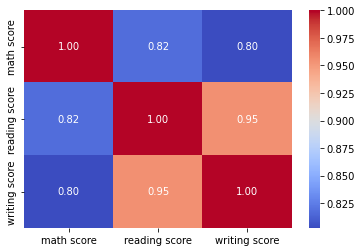

In [ ]:
# Correlation between test scores

correlation = score.corr()
sns.heatmap(correlation, annot = True, fmt = '.2f', cmap = 'coolwarm')

In [ ]:
# Calculate average of all test results
data['mean score'] = data.mean(axis = 1)

# Drop math score, reading score and writing score
data = data.drop(['math score', 'reading score', 'writing score'], axis = 1)

# Show first 5 rows of new dataframe
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean score
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333


In [ ]:
# Instantiate OneHotEncoder

ohe = OneHotEncoder(sparse = False)

In [ ]:
# Apply OneHotEncoder to the gender column

ohe.fit_transform(data[['gender']])[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [ ]:
# The first 5 rows the gender column for comparison

data['gender'].head()

0    female
1    female
2    female
3      male
4      male
Name: gender, dtype: object

In [ ]:
# Gender categories in OneHotEncoder (for nominal features)

ohe.categories_

[array(['female', 'male'], dtype=object)]

In [ ]:
# Unique values in the parental level of education column

list(data['parental level of education'].unique())

["bachelor's degree",
 'some college',
 "master's degree",
 "associate's degree",
 'high school',
 'some high school']

In [ ]:
# Specify the order for the level of education

education_categories = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]


In [ ]:
# Instantiate ordinal encoder

oe = OrdinalEncoder(categories = [education_categories])

In [ ]:
# Apply ordinal encoder to parental level of education column

oe.fit_transform(data[['parental level of education']])[:5]

array([[4.],
       [2.],
       [5.],
       [3.],
       [2.]])

In [ ]:
# Get predictor variables and target variable from data

X = data.drop('mean score', axis = 1)
Y = data['mean score']

In [ ]:
# Make column transformer which consists of OneHotEncoder and OrdincalEncoder

column_transform = make_column_transformer(
    (ohe, ['gender', 'race/ethnicity', 'lunch', 'test preparation course']),
    (oe, ['parental level of education']))

In [ ]:
# Apply column transformer to predictor variables

column_transform.fit_transform(X)[:5]

array([[1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 4.],
       [1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 2.],
       [1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 5.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 3.],
       [0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 2.]])

In [ ]:
# Train test split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (700, 5)
Y_train shape:  (700,)
X_test shape:  (300, 5)
Y_test shape:  (300,)


In [ ]:
# Instantiate pipeline with linear regression

lm = LinearRegression()
lm_pipeline = make_pipeline(column_transform, lm)

In [ ]:
# Instantiate pipeline with gradient boosting

gbm = GradientBoostingRegressor()
gbm_pipeline = make_pipeline(column_transform, gbm)

In [ ]:
# Fit pipeline to training set and make predictions on test set

lm_pipeline.fit(X_train, Y_train)
lm_predictions = lm_pipeline.predict(X_test)
print("First 5 LM predictions: ", list(lm_predictions[:5]))

gbm_pipeline.fit(X_train, Y_train)
gbm_predictions = gbm_pipeline.predict(X_test)
print("First 5 GBM predictions: ", list(gbm_predictions[:5]))

First 5 LM predictions:  [70.75, 66.25, 71.0625, 56.625, 78.0625]
First 5 GBM predictions:  [70.0324654075401, 72.82747187650256, 68.63467096651154, 58.88811703198366, 76.97875270900471]


In [ ]:
# Compare the number of predictions with the size of test set

print("Number of LM predictions: ", len(lm_predictions))
print("Number of GBM predictions: ", len(gbm_predictions))
print("Size of test set: ", len(Y_test))

Number of LM predictions:  300
Number of GBM predictions:  300
Size of test set:  300


In [ ]:
# Calculate mean square error and root mean squared error

lm_mae = mean_absolute_error(lm_predictions, Y_test)
lm_rmse =  np.sqrt(mean_squared_error(lm_predictions, Y_test))
print("LM MAE: {:.2f}".format(round(lm_mae, 2)))
print("LM RMSE: {:.2f}".format(round(lm_rmse, 2)))

gbm_mae = mean_absolute_error(gbm_predictions, Y_test)
gbm_rmse =  np.sqrt(mean_squared_error(gbm_predictions, Y_test))
print("GBM MAE: {:.2f}".format(round(gbm_mae, 2)))
print("GBM RMSE: {:.2f}".format(round(gbm_rmse, 2)))

LM MAE: 10.48
LM RMSE: 13.13
GBM MAE: 10.95
GBM RMSE: 13.78
